In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

In [287]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [288]:
df=pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [289]:
df.sample()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1247,28414,Male,50.0,0,0,Yes,Private,Urban,103.48,29.1,smokes,0


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [291]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [292]:
df.shape

(5110, 12)

In [293]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [294]:
df.duplicated().sum()

np.int64(0)

In [295]:
df['bmi'].mean().round(2)

np.float64(28.89)

In [296]:
# Replace all nan value with mean of bmi

df['bmi'].fillna(df['bmi'].mean().round(2),inplace=True)

/tmp/ipython-input-4069749720.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean().round(2),inplace=True)


In [297]:
# after fill mean of bmi for nan values in bmi column
df['bmi'].isnull().sum()

np.int64(0)

In [298]:
df['bmi'].sample(5)

,bmi
817,23.7
3860,31.5
3614,26.5
4479,38.2
4981,24.6


In [299]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.89,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0


In [300]:
df['heart_disease'].value_counts()

,count
heart_disease,
0,4834
1,276


In [301]:
# Check which columns are duplicated

df.columns[df.columns.duplicated()]

Index([], dtype='object')

In [302]:
# Now remove the column

df = df.loc[:, ~df.columns.duplicated()]


In [303]:
# now again check for duplicate column

df.columns[df.columns.duplicated()]

Index([], dtype='object')

In [304]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [305]:
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1


In [306]:
df['smoking_status'].value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


# Filtering


In [307]:
# How many people live in urban area & belong to government job??

m1=df['Residence_type']=='Urban'

m2=df['work_type']=='Govt_job'

df[m1 & m2].shape[0]

345

In [308]:
# How many people live in Rural area & belong to government job??

m1=df['Residence_type']=='Rural'

m2=df['work_type']=='Govt_job'

df[m1 & m2].shape[0]

312

In [309]:
# how many males are under age 25  heart diseases

m1=df['gender']=='Male'

m2=df['age']<=25
m3=df['heart_disease']=1

df[m1&m2&m3].shape[0]




595

In [310]:
# for ---> female
m1=df['gender']=='Female'

m2=df['age']<=25
m3=df['heart_disease']=1

df[m1&m2&m3].shape[0]

698

In [311]:

# how many Males above Before age 60  are 'hypertension' ??
b1 = df['gender'] == 'Male'
b2 = df['age'] < 60
b3 = df['hypertension'] == 1

count = df[b1 & b2 & b3].shape[0]
print(count)

98


In [312]:
#how many people are smoking
df[df['smoking_status']=='smokes'].shape[0]


789

In [313]:
# how many people are smoking during heart dieases under 18 age??
mask1=df['smoking_status']=='smokes'
mask2=df['heart_disease']==1
mask3=df['age']<18

df[mask1 & mask2 & mask3].shape[0]

9

In [314]:
# only for males
mask1=df['smoking_status']=='smokes'
mask2=df['heart_disease']==1
mask3=df['age']<18
mask4=df['gender']=='Male'

df[mask1 & mask2 & mask3 & mask4].shape[0]

3

In [315]:
# which  id number are high avg glocose level and low bmi
mak1=df['avg_glucose_level'].max()

mak2=df['bmi'].min()

count=df[(df['avg_glucose_level']==mak1) | (df['bmi']==mak2)]

count[['id','bmi','avg_glucose_level']]

,id,bmi,avg_glucose_level
193,69112,31.1,271.74
1609,38043,10.3,122.04


In [316]:

# which id have both hypertension and heart diease??
mask1=df['heart_disease']==1
mask2=df['hypertension']==1

count=df[mask1 & mask2]
count[['id','heart_disease','hypertension']].count().to_frame(name='Total Count')

,Total Count
id,498
heart_disease,498
hypertension,498


In [317]:
#  high blood glucose levels from diabetes are a significant risk factor for stroke.126 glusose level or higher is considered dangerous

# how many people have high glucose level and cause strokes??

m1=df['avg_glucose_level'].between(129,250)
m2=df['stroke']==1

df[m1 & m2].shape[0]



94

In [318]:
df[m1 & m2][['id','avg_glucose_level','stroke']]


,id,avg_glucose_level,stroke
0,9046,228.69,1
1,51676,202.21,1
3,60182,171.23,1
4,1665,174.12,1
5,56669,186.21,1
...,...,...,...
235,1210,211.06,1
237,36857,162.14,1
241,52282,197.28,1
242,45535,233.94,1


In [319]:
# sorting the id

df.sort_values(['id'], inplace=True)
df.reset_index(drop=True, inplace=True)


In [320]:
df.groupby(['bmi','avg_glucose_level']).size().sort_values(ascending=False)

bmi    avg_glucose_level
27.50  57.56                2
38.70  89.68                2
28.89  88.27                2
       101.45               2
31.10  67.92                2
                           ..
25.40  82.56                1
       81.77                1
       73.27                1
       71.81                1
       89.75                1
Length: 5103, dtype: int64

In [321]:
df.groupby(['gender','smoking_status','ever_married']).size().to_frame(name='Total Count')


Total Count
gender smoking_status  ever_married             
Female Unknown         No                    458
                       Yes                   378
       formerly smoked No                     87
                       Yes                   390
       never smoked    No                    335
                       Yes                   894
       smokes          No                    113
                       Yes                   339
Male   Unknown         No                    443
                       Yes                   265
       formerly smoked No                     59
                       Yes                   348
       never smoked    No                    195
                       Yes                   468
       smokes          No                     66
                       Yes                   271
Other  formerly smoked No                      1

In [322]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67,Female,17.0,0,1,No,Private,Urban,92.97,28.89,formerly smoked,0
1,77,Female,13.0,0,1,No,children,Rural,85.81,18.60,Unknown,0
2,84,Male,55.0,0,1,Yes,Private,Urban,89.17,31.50,never smoked,0
3,91,Female,42.0,0,1,No,Private,Urban,98.53,18.50,never smoked,0
4,99,Female,31.0,0,1,No,Private,Urban,108.89,52.30,Unknown,0


In [323]:
df.groupby(['gender','smoking_status','ever_married']).size().to_frame(name='Total Count')

Total Count
gender smoking_status  ever_married             
Female Unknown         No                    458
                       Yes                   378
       formerly smoked No                     87
                       Yes                   390
       never smoked    No                    335
                       Yes                   894
       smokes          No                    113
                       Yes                   339
Male   Unknown         No                    443
                       Yes                   265
       formerly smoked No                     59
                       Yes                   348
       never smoked    No                    195
                       Yes                   468
       smokes          No                     66
                       Yes                   271
Other  formerly smoked No                      1

In [324]:
df.groupby(['work_type','Residence_type']).size().to_frame(name='Employer Count').reset_index()

,work_type,Residence_type,Employer Count
0,Govt_job,Rural,312
1,Govt_job,Urban,345
2,Never_worked,Rural,7
3,Never_worked,Urban,15
4,Private,Rural,1462
5,Private,Urban,1463
6,Self-employed,Rural,393
7,Self-employed,Urban,426
8,children,Rural,340
9,children,Urban,347


In [325]:
df.groupby(['hypertension','gender']).size().to_frame(name='Total Count').reset_index()

,hypertension,gender,Total Count
0,0,Female,2718
1,0,Male,1893
2,0,Other,1
3,1,Female,276
4,1,Male,222


In [326]:
df.groupby(['ever_married','work_type']).size().to_frame(name='Employer Count').reset_index()

,ever_married,work_type,Employer Count
0,No,Govt_job,117
1,No,Never_worked,22
2,No,Private,821
3,No,Self-employed,110
4,No,children,687
5,Yes,Govt_job,540
6,Yes,Private,2104
7,Yes,Self-employed,709


In [327]:
df.groupby(['gender','stroke']).size().to_frame(name='Total Count').reset_index()

,gender,stroke,Total Count
0,Female,0,2853
1,Female,1,141
2,Male,0,2007
3,Male,1,108
4,Other,0,1


In [328]:
# how many childern are working
m1=df['work_type']=='children'
m2=df['age']<18

df[m1&m2].shape[0]

687

In [329]:
m1=df['heart_disease']==1
m4=df['heart_disease']==1
m2=df['smoking_status']=='smokes'
m3=df['stroke']==1


df[m1&m2&m3&m4].shape[0]

42

In [330]:
m2=df['smoking_status']=='smokes'
m1=df['work_type']=='children'
m3=df['age']<18

df[m1&m2&m3].shape[0]

2

# Visualization of Data

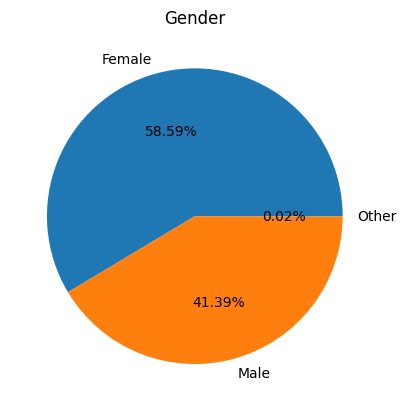

In [356]:
plt.pie(df['gender'].value_counts(),labels=df['gender'].unique(),autopct='%1.2f%%')
plt.title('Gender')
plt.show()

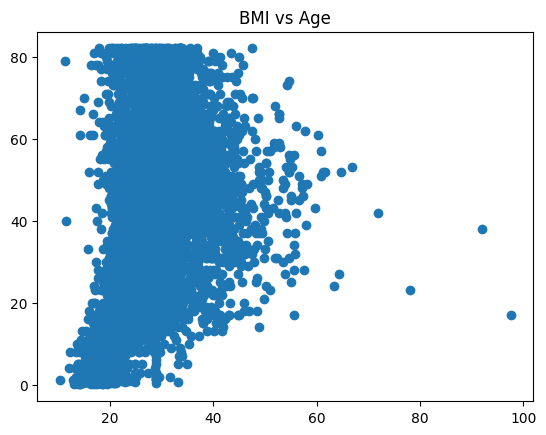

In [332]:
plt.scatter(df['bmi'],df['age'])

plt.title('BMI vs Age')
plt.show()


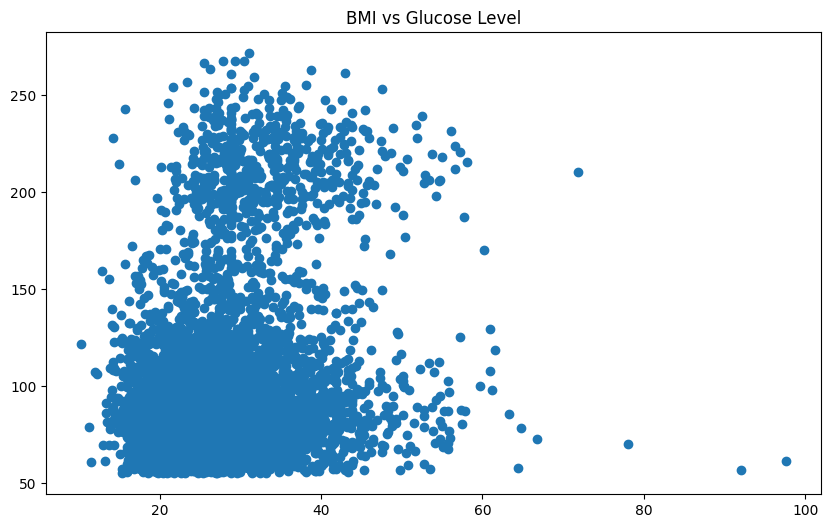

In [333]:
plt.figure(figsize=(10,6))

plt.scatter(df['bmi'],df['avg_glucose_level'])

plt.title('BMI vs Glucose Level' )
plt.show()


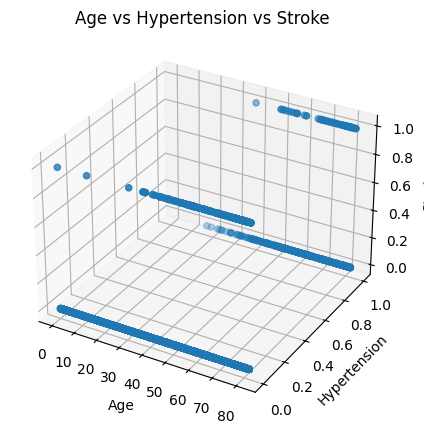

In [334]:
#Hypertension is the most significant risk factor for stroke, as it damages arteries over time, making them more likely to burst or become blocked
fig=plt.figure(figsize=(10,5))

ax=plt.subplot(projection='3d')

ax.scatter3D(df['age'],df['hypertension'],df['stroke'])

ax.set_xlabel('Age')
ax.set_ylabel('Hypertension')
ax.set_zlabel('Stroke')
ax.set_title('Age vs Hypertension vs Stroke')
plt.show()

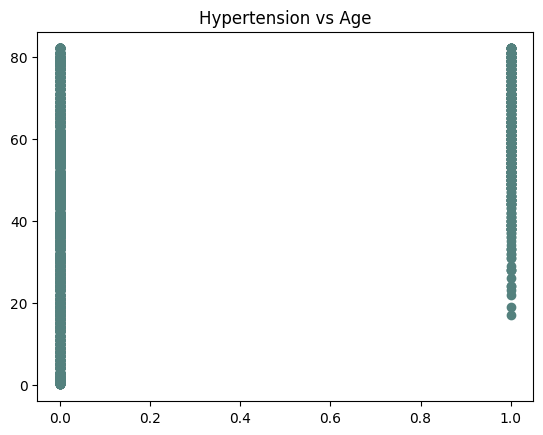

In [335]:
plt.scatter(df['hypertension'],df['age'],color='#54817e')


plt.title('Hypertension vs Age')

plt.show()

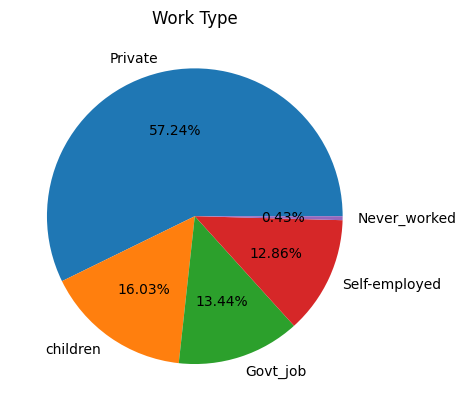

In [336]:
plt.pie(df['work_type'].value_counts(),labels=df['work_type'].unique(),autopct='%1.2f%%')

plt.title('Work Type')
plt.show()

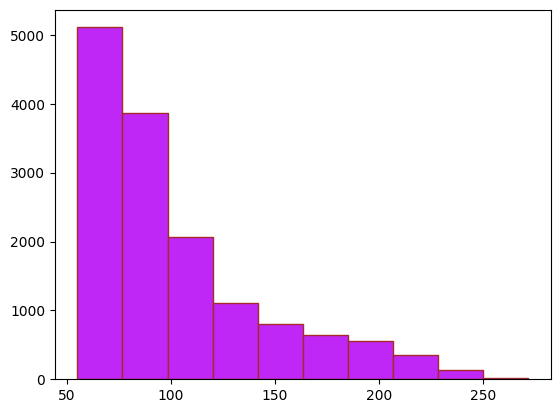

In [337]:
plt.hist(df['avg_glucose_level'],color='#BE27F5',histtype='barstacked',edgecolor='brown',cumulative=-1)

plt.xlabel='Average Glucose Level'
plt.ylabel='Count'
plt.show()

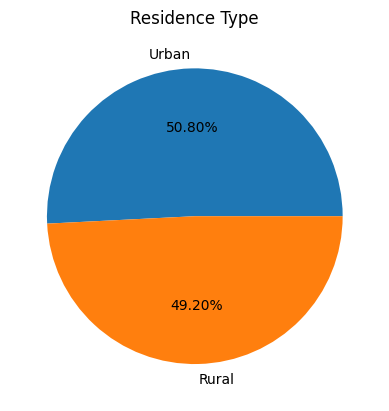

In [338]:
plt.pie(df['Residence_type'].value_counts(),labels=df['Residence_type'].unique(),autopct='%1.2f%%')

plt.title('Residence Type')
plt.show()

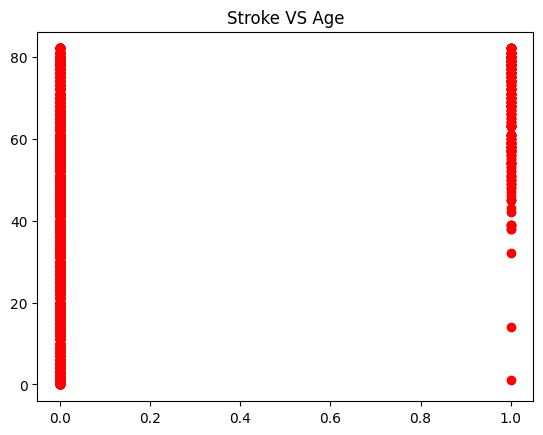

In [355]:
plt.scatter(df['stroke'],df['age'],color='red')
plt.title('Stroke VS Age')

plt.show()

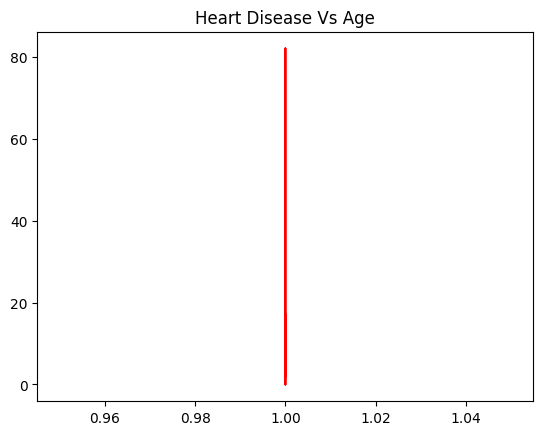

In [354]:
# in this data all value 1 in heart_disease column
plt.plot(df['heart_disease'],df['age'],color='red')
plt.title('Heart Disease Vs Age')

plt.show()

In [341]:
df['age']=df['age'].astype(int)


In [342]:
df[['smoking_status','gender']].value_counts()

smoking_status   gender
never smoked     Female    1229
Unknown          Female     836
                 Male       708
never smoked     Male       663
formerly smoked  Female     477
smokes           Female     452
formerly smoked  Male       407
smokes           Male       337
formerly smoked  Other        1
Name: count, dtype: int64

In [343]:
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67,Female,17,0,1,No,Private,Urban,92.97,28.89,formerly smoked,0
1,77,Female,13,0,1,No,children,Rural,85.81,18.60,Unknown,0
2,84,Male,55,0,1,Yes,Private,Urban,89.17,31.50,never smoked,0
3,91,Female,42,0,1,No,Private,Urban,98.53,18.50,never smoked,0
4,99,Female,31,0,1,No,Private,Urban,108.89,52.30,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,72911,Female,57,1,1,Yes,Private,Rural,129.54,60.90,smokes,0
5106,72914,Female,19,0,1,No,Private,Urban,90.57,24.20,Unknown,0
5107,72915,Female,45,0,1,Yes,Private,Urban,172.33,45.30,formerly smoked,0
5108,72918,Female,53,1,1,Yes,Private,Urban,62.55,30.30,Unknown,1


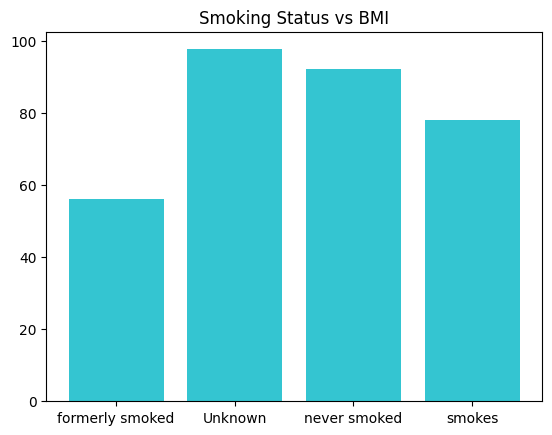

In [344]:
plt.bar(df['smoking_status'],df['bmi'],color='#34C5D1')

plt.title('Smoking Status vs BMI')
plt.show()

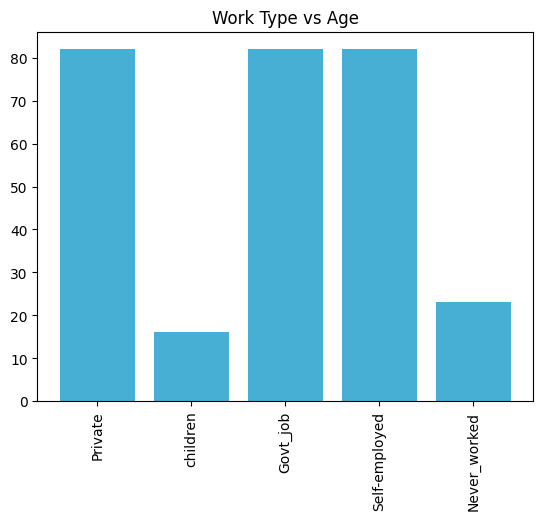

In [345]:
plt.bar(df['work_type'],df['age'],color='#48AFD4')
plt.xticks(rotation='vertical')

plt.title('Work Type vs Age')

plt.show()

In [346]:
df['stroke'].unique()

array([0, 1])

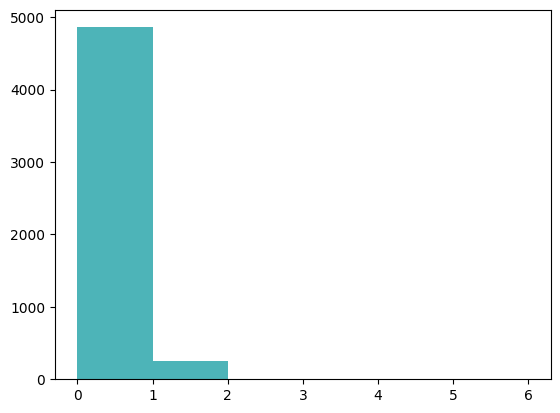

In [347]:
plt.hist(df['stroke'],bins=[0,1,2,3,4,5,6],color='#4DB4B8')


plt.show()

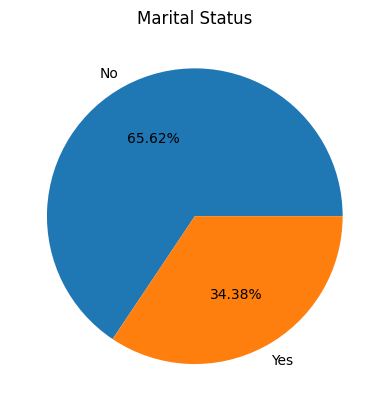

In [353]:
plt.pie(df['ever_married'].value_counts(),labels=df['ever_married'].unique(),autopct='%1.2f%%')
plt.title('Marital Status')
plt.show()

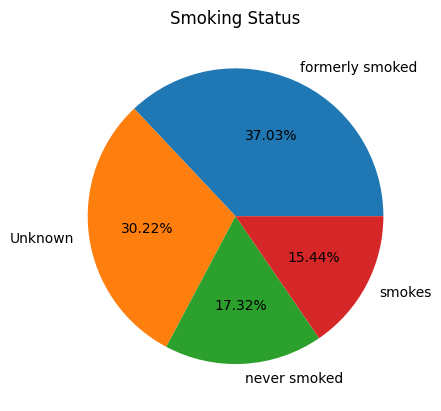

In [351]:
plt.pie(df['smoking_status'].value_counts(),labels=df['smoking_status'].unique(),autopct='%1.2f%%')
plt.title('Smoking Status')
plt.show()

# PARAGRAPH FOR MAKING A USEFUL INSIGHT

First of all majority of a Work Type is  private employee is almost 57.27% .so i tell about  687 childern working in below 18 age and 0.43% are unemployed.  80% people live in Urban Area & 49.20% people live in Rural area so we can say almost equal.65.62% are unmarried in overall data.if I am talking diease and addiction.so i tell whose people who curently smoking 789 people(452 female & 337 are males) which is 15.44% of data. 42 people are still smoking who have a heart disease, stroke &hypertension.& 17.32% are never smoked. the people who smoke the bmi range is (60-80). in this dataset all id are registered of  heart disease which is 1 (1==yes, 0==No). if i am  taking about total people who have hypertension 498(276 Female & 222 Males).majority hypertension patient are age between (20 to 80) see in the image('Hypertension vs Age') you see (1==yes, 0==No).if i am  taking about total people who have stroke total people is 249(Female=141 & Male=108).majority of a stoke are age (40 or above) see in the image('strokes vs Age').you see (1==yes, 0==No).so people who bmi is range(20-40) who have average glucose level is range(50-150).you see image of('BMI vs Glucose Level').At the end Hypertension is the most significant risk factor for stroke.sp you  can see image('age vs hypertension vs stroke')

# Refrence image Name:
1. 'age vs hypertension vs stroke'
2. 'BMI vs Glucose Level'
3. 'strokes vs Age'
4. 'Work Type'
5. 'Residence Type'
6. 'Smoking Status'
7. 'Hypertension vs Age'
8. 'Heart Disease Vs Age'
9. 'Work Type VS Age'
10. 'Smoking Status VS BMI'
11. 'Marital Status'
12. 'strokes vs Age'
13. 'Gender'
14. 'BMI VS Age'
15. some images see on  tubular data like groupby() etc...


